In [1]:
import matplotlib.pyplot as plt
import sys
import os
import numpy as np
%load_ext autoreload
%autoreload 2

In [2]:
root_dir = os.path.abspath('../')
sys.path.append(root_dir)
sys.path.append(os.path.join(root_dir,'../DPMJET-III-gitlab'))
print root_dir

pythia_dir = os.path.join(
    os.path.expanduser('~'), 'devel', 'apps', 'pythia8240')
sys.path.append(os.path.join(pythia_dir, 'lib'))

from impy.definitions import *
from impy.constants import *
from impy.kinematics import EventKinematics
from impy.common import impy_config, pdata

/afs/ifh.de/group/that/work-af/devel/git/impy


In [3]:
# AF: This is what the user interaction has to yield.
# It is the typical expected configuration that one
# wants to run (read pp-mode at energies not exceeding
# 7 TeV). If you want cosmic ray energies, this should
# be rather p-N at 10 EeV and lab frame (not yet defined).

event_kinematics = EventKinematics(
    ecm= 7000 * GeV,
    p1pdg=321,
    p2pdg=2212
#     nuc2_prop=(12,6)
)

In [4]:
impy_config["user_frame"] = 'center-of-mass'
impy_config['tau_stable'] = 10e-12
impy_config['pi0_stable'] = True

In [5]:
# Define the two models
m1 = 'QGSJET01C'
m2 = 'QGSJETII04'

In [6]:
gen_m1 = make_generator_instance(interaction_model_by_tag[m1])
gen_m1.init_generator(event_kinematics)
# import IPython
# IPython.embed()
gen_m2 = make_generator_instance(interaction_model_by_tag[m2])
gen_m2.init_generator(event_kinematics)


('qgsjet', 'stdout', 6)


In [7]:
n_bins = 30
bins = np.linspace(-1,1.,n_bins+1)
grid = 0.5*(bins[1:] + bins[:-1])
widths = (bins[1:] - bins[:-1])

m1_pions = np.zeros(n_bins)
m1_protons = np.zeros(n_bins)

eta_bins = np.linspace(-7,7,n_bins+1)
eta_grid = 0.5*(eta_bins[1:] + eta_bins[:-1])
widths_eta = (eta_bins[1:] - eta_bins[:-1])

m1_charged_eta = np.zeros(n_bins)

n_events = 10000
norm = 1./float(n_events)

# This
for event in gen_m1.event_generator(event_kinematics, n_events):
    event.filter_final_state_charged()
    m1_protons += norm/widths*np.histogram(event.xf[event.p_ids == 2212],bins=bins)[0]
    m1_pions += norm/widths*np.histogram(event.xf[np.abs(event.p_ids) == 211],bins=bins)[0]
    m1_charged_eta += norm/widths_eta*np.histogram(event.eta,bins=eta_bins)[0]

In [8]:
m2_pions = np.zeros(n_bins)
m2_protons = np.zeros(n_bins)
m2_charged_eta = np.zeros(n_bins)

for event in gen_m2.event_generator(event_kinematics, n_events):
    event.filter_final_state_charged()
    m2_protons += norm/widths*np.histogram(event.xf[event.p_ids == 2212],bins=bins)[0]
    m2_pions += norm/widths*np.histogram(event.xf[np.abs(event.p_ids) == 211],bins=bins)[0]
    m2_charged_eta += norm/widths_eta*np.histogram(event.eta,bins=eta_bins)[0]

/afs/ifh.de/group/that/work-af/devel/git/impy/impy/common.py:205: RuntimeWarning: invalid value encountered in divide
  return np.log((self.p_tot + self.pz) / self.pt)
/afs/ifh.de/group/that/work-af/devel/git/impy/impy/common.py:205: RuntimeWarning: divide by zero encountered in divide
  return np.log((self.p_tot + self.pz) / self.pt)


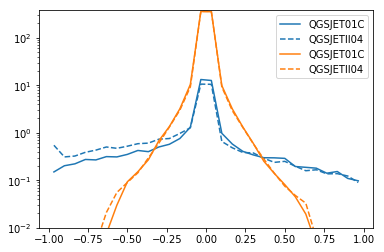

In [9]:
l=plt.plot(grid, m1_protons,label=m1)[0]
plt.plot(grid, m2_protons,c=l.get_color(), ls='--',label=m2)
l=plt.plot(grid, m1_pions,label=m1)[0]
plt.plot(grid, m2_pions,c=l.get_color(), ls='--',label=m2)
plt.ylim(1e-2,)
plt.semilogy()
plt.legend()

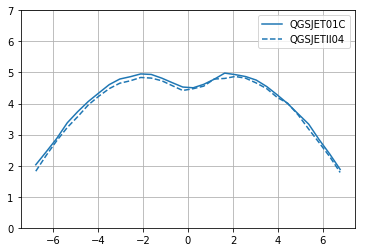

In [10]:
l=plt.plot(eta_grid, m1_charged_eta, label=m1)[0]
plt.plot(eta_grid, m2_charged_eta,c=l.get_color(), ls='--', label=m2)
plt.ylim(0,7)
plt.grid()
plt.legend()

In [11]:
for event in gen_m1.event_generator(event_kinematics, 3):
    event.filter_final_state_charged()
    for pid, x, y, z, e in zip(event.p_ids, event.px, event.py, event.pz, event.en):
        print '{0:8}: {1:10.2e} {2:10.2e} {3:10.2e} {4:10.2e}'.format(pid, x, y, z, e) 

   -2212:   5.17e-01   2.26e-01   4.19e-01   1.17e+00
    -211:   2.07e+00  -1.67e+00  -2.89e+01   2.90e+01
     211:   3.75e-01   2.77e-01  -2.37e+01   2.37e+01
     211:  -5.28e-01   2.66e-01  -7.76e+01   7.76e+01
     211:   3.96e-01  -4.39e-01  -1.35e+02   1.35e+02
    2212:  -8.03e-01  -3.83e-01   1.56e+03   1.56e+03
     211:  -3.31e-02  -2.12e-01  -2.55e-01   3.61e-01
     211:   1.57e-01  -3.90e-01  -1.63e+01   1.63e+01
    -211:   9.66e-03  -3.32e-02  -1.72e+00   1.73e+00
    -211:  -2.80e-01  -4.61e-01  -5.72e+01   5.72e+01
    -211:   6.76e-02  -7.07e-03  -1.43e+00   1.44e+00
     211:   1.31e-01   1.75e-01  -3.58e+00   3.59e+00
    -211:  -7.95e-02   6.10e-01  -8.28e+01   8.28e+01
    -211:  -2.72e-01   6.33e-01  -1.25e+02   1.25e+02
     211:  -5.32e-01   2.64e-01  -5.20e+01   5.20e+01
     321:  -2.02e-01  -2.24e-01   2.28e+00   2.35e+00
    -211:   2.55e-01  -1.65e-01   1.25e+02   1.25e+02
     211:  -3.57e-01  -5.55e-02   4.15e+02   4.15e+02
    -211:   3.58e-01  -1.26e

In [12]:
gen_m2.lib.pomdls.iswmdl[5]

3